**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

**IT'S A BASIC IMPLEMENTATION OF ANN**

# Artificial Neural Networks (ANNs) in Deep Learning

## 1. Basic Structure of an ANN
- **Input Layer**: The first layer that receives the input data.
- **Hidden Layers**: Intermediate layers that process the inputs through weighted connections and activation functions.
- **Output Layer**: The final layer that produces the output.



## 2. Neurons and Weights
- **Neurons**: Basic units that receive inputs, apply weights, and pass the result through an activation function.
- **Weights**: Parameters that are adjusted during training to minimize error.



## 3. Activation Functions
- **Purpose**: Introduce non-linearity into the model, allowing it to learn complex patterns.
- **Common Functions**:
  - **ReLU (Rectified Linear Unit)**: $f(x) = \max(0, x)$
  - **Sigmoid**: $f(x) = \frac{1}{1 + e^{-x}}$
  - **Tanh**: $f(x) = \tanh(x)$



## 4. Forward Propagation
- **Process**: Input data is passed through the network layer by layer to produce an output.
- **Steps**:
  1. Multiply inputs by weights: $z = w \cdot x + b$
  2. Apply the activation function: $a = f(z)$



## 5. Loss Function
- **Purpose**: Measures the difference between the predicted output and the actual target.
- **Common Loss Functions**:
  - **Mean Squared Error (MSE)**: $L = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$
  - **Cross-Entropy Loss**: $L = -\sum_{i=1}^N y_i \log(\hat{y}_i)$



## 6. Backpropagation
- **Purpose**: Adjusts the weights to minimize the loss.
- **Steps**:
  1. Compute the gradient of the loss function with respect to each weight: $\frac{\partial L}{\partial w}$
  2. Update the weights using gradient descent: $w = w - \eta \frac{\partial L}{\partial w}$


## 7. Gradient Descent
- **Purpose**: Optimizes the weights by iteratively moving towards the minimum of the loss function.
- **Types**:
  - **Batch Gradient Descent**: Uses the entire dataset for each update.
  - **Stochastic Gradient Descent (SGD)**: Uses a single data point for each update.
  - **Mini-Batch Gradient Descent**: Uses a subset of the data for each update.



## 8. Training the Network
- **Epochs**: One complete pass through the entire training dataset.
- **Iterations**: One update of the model's weights (one step of gradient descent).



## 9. Overfitting and Regularization
- **Overfitting**: When the model performs well on training data but poorly on unseen data.
- **Regularization Techniques**:
  - **L1/L2 Regularization**: Adds a penalty for larger weights.
    - L1: $L_{\text{reg}} = \lambda \sum |w|$
    - L2: $L_{\text{reg}} = \lambda \sum w^2$
  - **Dropout**: Randomly drops neurons during training to prevent co-adaptation.



## 10. Evaluation
- **Metrics**: Measure the performance of the model on validation/test data.
- **Common Metrics**:
  - **Accuracy**: $\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$
  - **Mean Absolute Error (MAE)**: $\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$



## Key Points to Remember
1. **Data Preprocessing**: Normalize or standardize input data for better performance.
2. **Hyperparameter Tuning**: Experiment with different architectures, learning rates, and batch sizes.
3. **Cross-Validation**: Use techniques like k-fold cross-validation to ensure model robustness.

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
#import  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
dataset= pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#divide the data , not including features 1,2,3(not useful)
X=dataset.iloc[:,3:13]
y= dataset.iloc[:,13]

In [ ]:
#converting categorical data into numerical data
geography=pd.get_dummies(X["Geography"], drop_first=True).astype(int)
gender = pd.get_dummies(X["Gender"], drop_first=True).astype(int)



In [ ]:
#drop the categorical features so we can add converted features
X=X.drop(["Geography", "Gender"], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
#adding the converted features to dataset
X=pd.concat([X, geography, gender], axis =1)


In [ ]:
#split the data for train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

In [ ]:
#scaling the data so faster convergence
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#libraries to train the neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU

In [ ]:
classifier= Sequential()


In [ ]:
#assign layers
classifier.add(Dense(units=11, activation='relu'))#input layer
classifier.add(Dense(units=7, activation= 'relu'))#hidden layer one
classifier.add(Dense(units=5, activation = 'relu'))#hidden layer two
classifier.add(Dense(units=1, activation = 'sigmoid'))#output layer


In [ ]:
#optinal
opti= tf.keras.optimizers.Adam(learning_rate=0.01)#custom leaarning rate

In [ ]:
classifier.compile(optimizer= opti, loss = 'binary_crossentropy', metrics =['accuracy'])#adding optimizer and loss and evaluation metrics

In [ ]:
#for early stoping, we can add more metrics though
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
)

In [ ]:
#model training
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size= 8, epochs = 100, callbacks= [early_stopping])

Epoch 1/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3235 - accuracy: 0.8716 - val_loss: 0.3691 - val_accuracy: 0.8459
Epoch 2/100
670/670 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8686 - val_loss: 0.3716 - val_accuracy: 0.8497
Epoch 3/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3264 - accuracy: 0.8666 - val_loss: 0.3657 - val_accuracy: 0.8516
Epoch 4/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3240 - accuracy: 0.8673 - val_loss: 0.3764 - val_accuracy: 0.8501
Epoch 5/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3262 - accuracy: 0.8673 - val_loss: 0.3619 - val_accuracy: 0.8489
Epoch 6/100
670/670 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8722 - val_loss: 0.3619 - val_accuracy: 0.8523
Epoch 7/100
670/670 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8696 - val_loss: 0.3803 - val_accuracy: 0.8497

In [ ]:
#metrics we taken for early stopping
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#for prediction
y_pred= classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
#evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))



[[1562  234]
 [  45  159]]
0.8605


well

In [ ]:
classifier.get_weights()

[array([[ 0.04491749,  0.06234006,  0.1780867 ,  0.37704265, -0.0629518 ,
          1.4626184 ,  1.5478119 , -1.5747694 , -0.29386878, -0.08065072,
          0.22182238],
        [-0.58733946,  1.6344497 ,  1.038319  ,  0.5543893 , -2.871493  ,
         -0.2952322 ,  0.9273755 , -1.6104864 , -0.7503929 ,  2.84339   ,
         -3.302568  ],
        [-0.11230498, -0.53152454,  0.8523822 , -0.7586392 , -0.12192608,
          0.4141364 , -0.03173837, -1.3162571 ,  0.11722507,  0.3328177 ,
         -0.2812582 ],
        [ 0.9840929 , -0.1429502 , -2.8026829 ,  2.4487288 , -0.01922684,
         -1.7699536 , -2.3839486 ,  0.5113053 , -1.9089708 , -0.07586832,
          0.30529377],
        [ 3.6364255 , -3.0869699 , -3.4111145 ,  2.3754332 ,  0.58759844,
         -0.5233019 , -0.511344  ,  0.5717845 , -3.1961095 ,  0.06553768,
         -1.4977857 ],
        [-0.5711836 ,  0.0435731 , -0.6081741 ,  0.27902722, -1.0814021 ,
          0.2823362 ,  0.82549936,  2.6212196 ,  0.8590283 ,  0.2049869

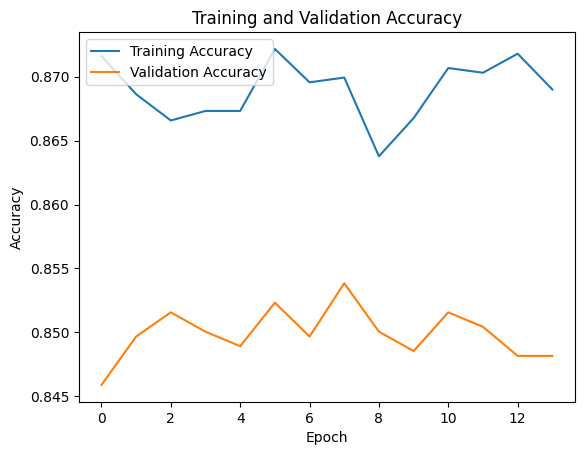

In [ ]:
# Plot training and validation accuracy
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

**Summary of Improvements**

Address class imbalance using class weights, oversampling, or undersampling.

Tune the decision threshold to balance precision and recall for your requirement.

Improve the model architecture by adding layers, neurons, or regularization, use dropout and increase epochs.


Evaluate manually based on you requirement.